In [35]:
#Task1 Dowmload dataset

In [36]:
#Task2 Load datset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('D:/parna/VIT/AI ML internship/penguins_size.csv')

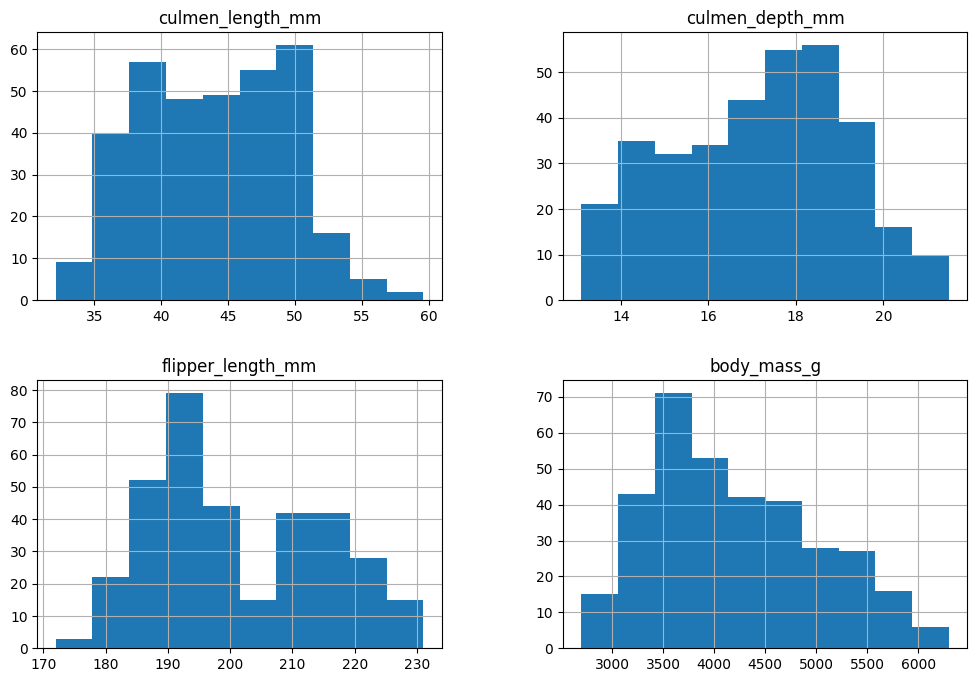

In [37]:
#Task3: Perform Visualizations
#Univariate Analysis
data.hist(figsize=(12, 8))
plt.show()

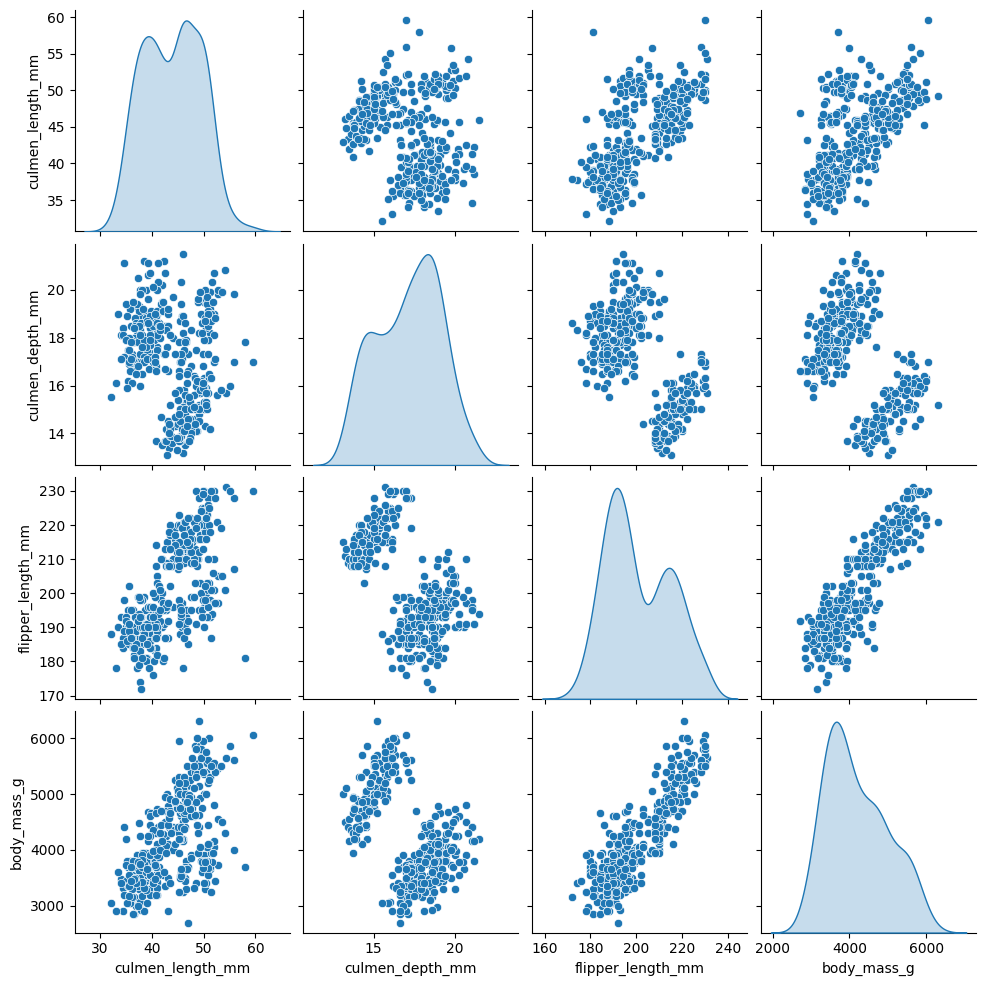

In [38]:
#Bivariate Analysis
sns.pairplot(data, diag_kind='kde')
plt.show()

C:\Users\Parna Chaudhury\AppData\Local\Temp\ipykernel_24260\981231963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


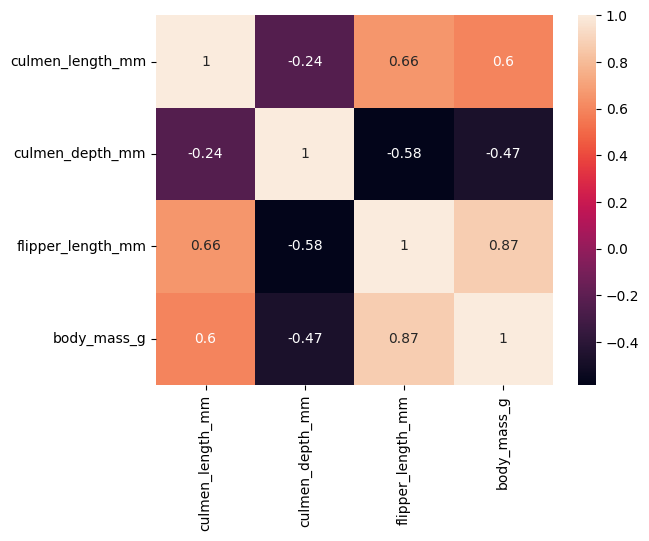

In [39]:
#Multi-Variate Analysis 
sns.heatmap(data.corr(),annot=True)
plt.show()

In [40]:
#Task4: Perform Descriptive Statistics
summary_stats = data.describe()
print(summary_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [41]:
#Task5: Check for Missing Values and Handle Them
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [42]:
data.culmen_length_mm.isnull()

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: culmen_length_mm, Length: 344, dtype: bool

In [43]:
data['culmen_length_mm'] = data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean())

In [44]:
data['culmen_depth_mm'] = data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean())

In [45]:
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].mean())

In [46]:
data['sex'] = data['sex'].fillna(data['sex'].mode())

In [47]:
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean())

In [48]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [49]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [50]:
data=data.replace(to_replace=".", value="MALE")

In [51]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [52]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

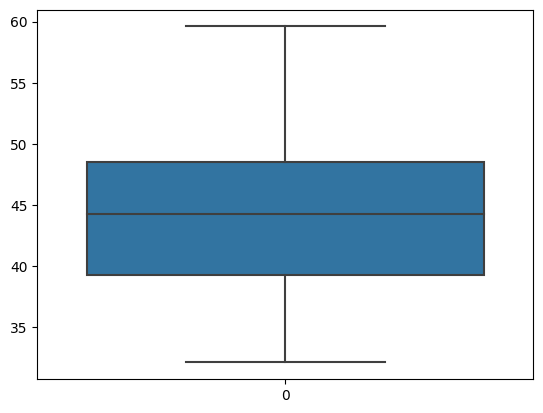

In [53]:
#Task6: Find and Handle Outliers
sns.boxplot(data['culmen_length_mm'])

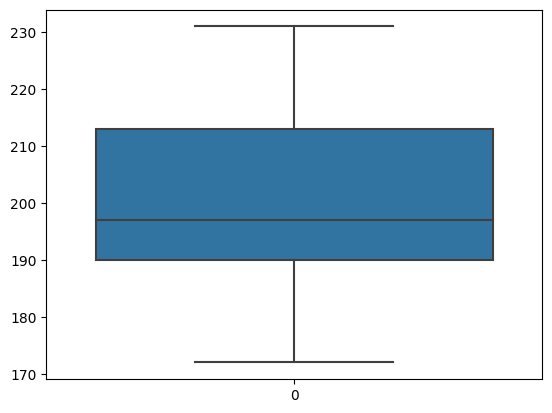

In [54]:
sns.boxplot(data['flipper_length_mm'])
plt.show()

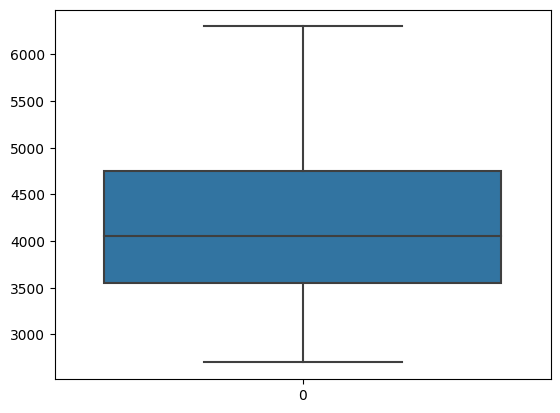

In [55]:
sns.boxplot(data['body_mass_g'])
plt.show()

In [56]:
#Task7: Check Correlation
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['body_mass_g'].sort_values(ascending=False)
print(correlation_with_target)

body_mass_g          1.000000
flipper_length_mm    0.871202
culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
Name: body_mass_g, dtype: float64


C:\Users\Parna Chaudhury\AppData\Local\Temp\ipykernel_24260\1221629307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [57]:
#Task8: Check for Categorical Columns and Perform Encoding
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
print(data)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2          39.10000         18.70000         181.000000   
1          0       2          39.50000         17.40000         186.000000   
2          0       2          40.30000         18.00000         195.000000   
3          0       2          43.92193         17.15117         200.915205   
4          0       2          36.70000         19.30000         193.000000   
..       ...     ...               ...              ...                ...   
339        2       0          43.92193         17.15117         200.915205   
340        2       0          46.80000         14.30000         215.000000   
341        2       0          50.40000         15.70000         222.000000   
342        2       0          45.20000         14.80000         212.000000   
343        2       0          49.90000         16.10000         213.000000   

     body_mass_g  sex  
0    3750.000000    1  
1    3800.00000

In [58]:
#Task9: Split Data into Dependent and Independent Variables
x = data.drop('body_mass_g', axis=1)
print(x.head)
y = data['body_mass_g']
print(y.head)

<bound method NDFrame.head of      species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2          39.10000         18.70000         181.000000   
1          0       2          39.50000         17.40000         186.000000   
2          0       2          40.30000         18.00000         195.000000   
3          0       2          43.92193         17.15117         200.915205   
4          0       2          36.70000         19.30000         193.000000   
..       ...     ...               ...              ...                ...   
339        2       0          43.92193         17.15117         200.915205   
340        2       0          46.80000         14.30000         215.000000   
341        2       0          50.40000         15.70000         222.000000   
342        2       0          45.20000         14.80000         212.000000   
343        2       0          49.90000         16.10000         213.000000   

     sex  
0      1  
1      0  


In [59]:
#Task10: Scaling the Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler
cname=data.columns[:]
data[cname]=scaler().fit_transform(data[cname])
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,0.0,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,0.0,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...,...
339,1.0,0.0,0.429888,0.482282,0.490088,0.417154,1.0
340,1.0,0.0,0.534545,0.142857,0.728814,0.597222,0.0
341,1.0,0.0,0.665455,0.309524,0.847458,0.847222,1.0
342,1.0,0.0,0.476364,0.202381,0.677966,0.694444,0.0


In [60]:
#Task11: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:      species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
66         0       0              35.5             16.2              195.0   
229        2       0              46.8             15.4              215.0   
7          0       2              39.2             19.6              195.0   
140        0       1              40.2             17.1              193.0   
323        2       0              49.1             15.0              228.0   
..       ...     ...               ...              ...                ...   
188        1       1              47.6             18.3              195.0   
71         0       2              39.7             18.4              190.0   
106        0       0              38.6             17.2              199.0   
270        2       0              46.6             14.2              210.0   
102        0       0              37.7             16.0              183.0   

     sex  
66     0  
229    1  
7      1  
140    0  

In [61]:

#Task12: Check Data Shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (275, 6) (275,)
Testing Data Shape: (69, 6) (69,)
